# SOMPY 

In [11]:
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import numpy as np
from time import time
import sompy

### A toy example: two dimensional data, four clusters

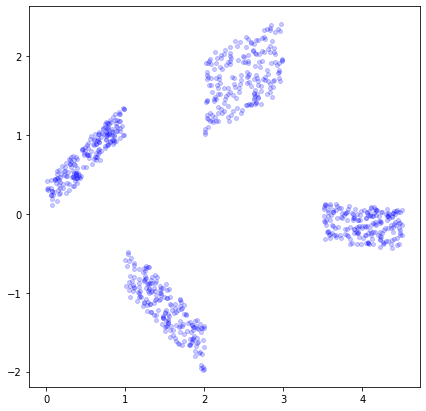

In [13]:
dlen = 200
Data1 = pd.DataFrame(data= 1*np.random.rand(dlen,2))
Data1.values[:,1] = (Data1.values[:,0][:,np.newaxis] + .42*np.random.rand(dlen,1))[:,0]


Data2 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+1)
Data2.values[:,1] = (-1*Data2.values[:,0][:,np.newaxis] + .62*np.random.rand(dlen,1))[:,0]

Data3 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+2)
Data3.values[:,1] = (.5*Data3.values[:,0][:,np.newaxis] + 1*np.random.rand(dlen,1))[:,0]


Data4 = pd.DataFrame(data= 1*np.random.rand(dlen,2)+3.5)
Data4.values[:,1] = (-.1*Data4.values[:,0][:,np.newaxis] + .5*np.random.rand(dlen,1))[:,0]


Data1 = np.concatenate((Data1,Data2,Data3,Data4))

fig = plt.figure()
plt.plot(Data1[:,0],Data1[:,1],'ob',alpha=0.2, markersize=4)
fig.set_size_inches(7,7)

In [20]:
mapsize = [20,20]
# this will use the default parameters, but i can change the initialization and neighborhood methods
som = sompy.SOMFactory.build(Data1, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var',
                             initialization='pca', neighborhood='gaussian', training='batch', name='sompy')
# verbose='debug' will print more, and verbose=None wont print anything
som.train(n_job=1, verbose=None)  

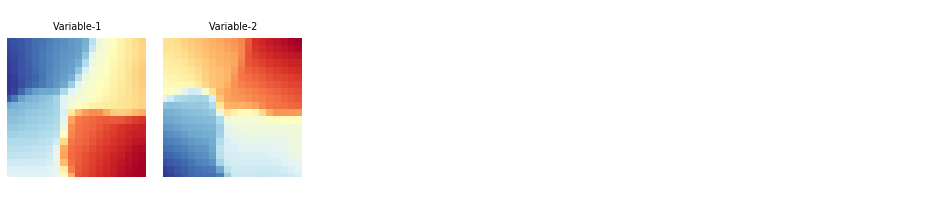

In [21]:
v = sompy.mapview.View2DPacked(50, 50, '',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

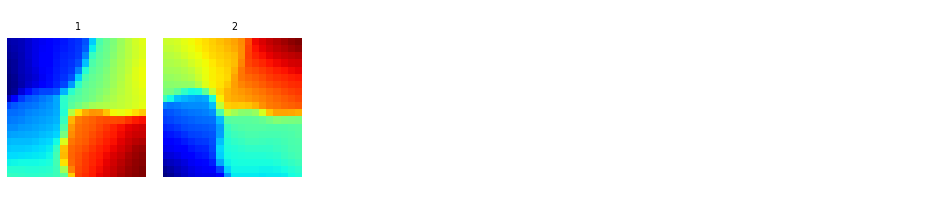

In [22]:
som.component_names = ['1','2']
v = sompy.mapview.View2DPacked(50, 50, '',text_size=8)  
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6) #which_dim='all' default